In [86]:
%pip install plotly
import plotly as px
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [87]:
import pandas as pd

In [88]:
import numpy as np

In [89]:
import matplotlib.pyplot as plt

In [90]:
data=pd.read_csv('weather1.csv')

In [91]:
data.head()

,Day,Hour,Temperature,Relative Humidity,Wind Speed,Wind Direction
0,2,0,28.94,77,9.69,221.99
1,2,1,28.79,79,13.04,219.40
2,2,2,28.59,79,7.99,215.84
3,2,3,28.47,79,5.48,203.20
4,2,4,28.40,78,5.24,195.95


LINE CHART


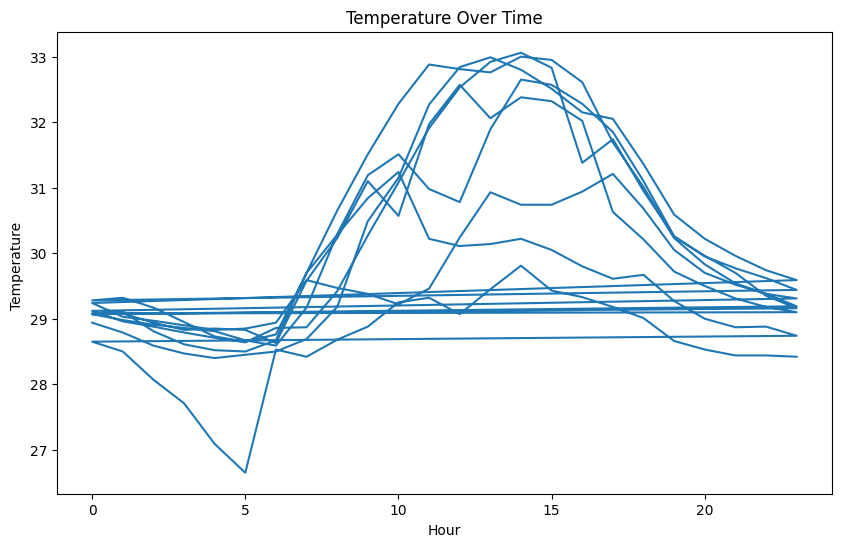

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(data['Hour'], data['Temperature '])
plt.title('Temperature Over Time')
plt.xlabel('Hour')
plt.ylabel('Temperature ')
plt.show()

SCATTER PLOT

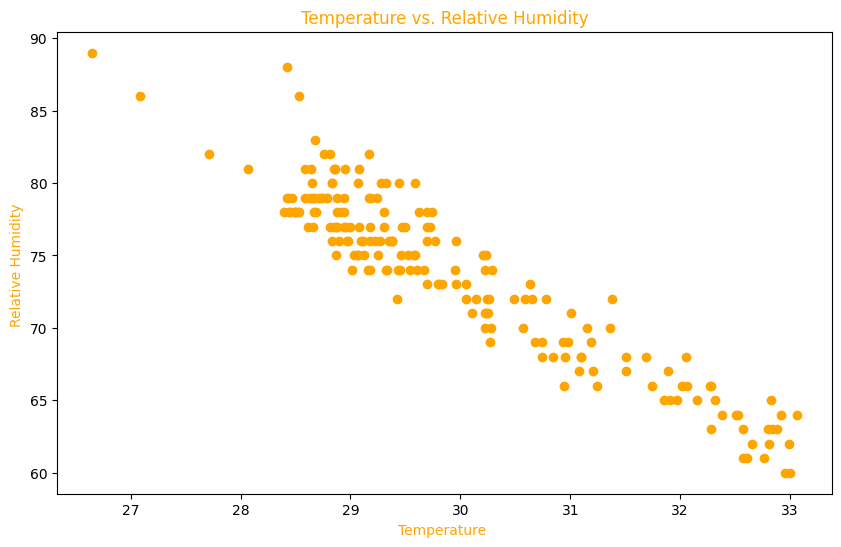

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature '], data['Relative Humidity '],color='orange')
plt.xlabel('Temperature ',color='orange')
plt.ylabel('Relative Humidity ',color='orange')
plt.title('Temperature vs. Relative Humidity',color='orange')
plt.show()

HISTOGRAM

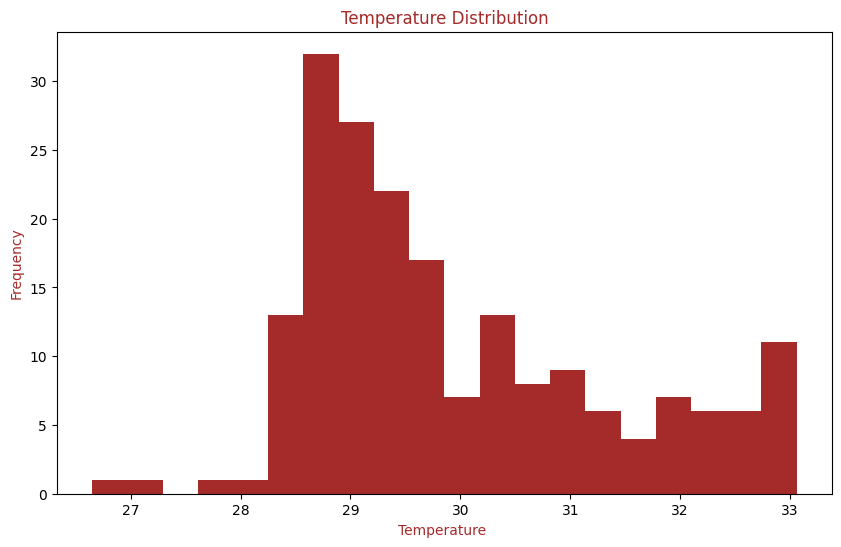

In [94]:
plt.figure(figsize=(10, 6))
plt.hist(data['Temperature '], bins=20,color='brown')
plt.xlabel('Temperature ',color='brown')
plt.ylabel('Frequency',color='brown')
plt.title('Temperature Distribution',color='brown')
plt.show()

BOX PLOT

<Figure size 1000x600 with 0 Axes>

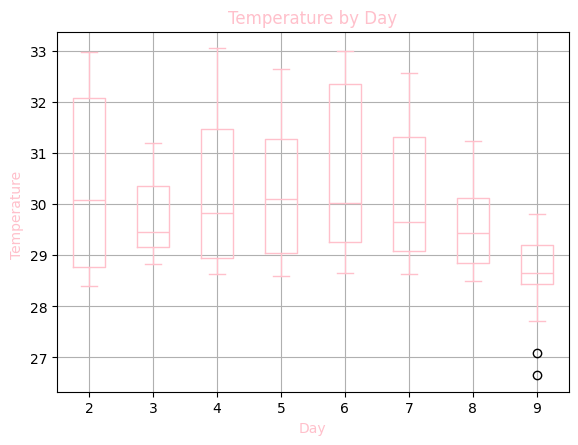

In [95]:
plt.figure(figsize=(10, 6))
data.boxplot(column='Temperature ', by='Day',color='pink')
plt.xlabel('Day',color='pink')
plt.ylabel('Temperature ',color='pink')
plt.title('Temperature by Day',color='pink')
plt.suptitle('')
plt.show()


AREA CHART

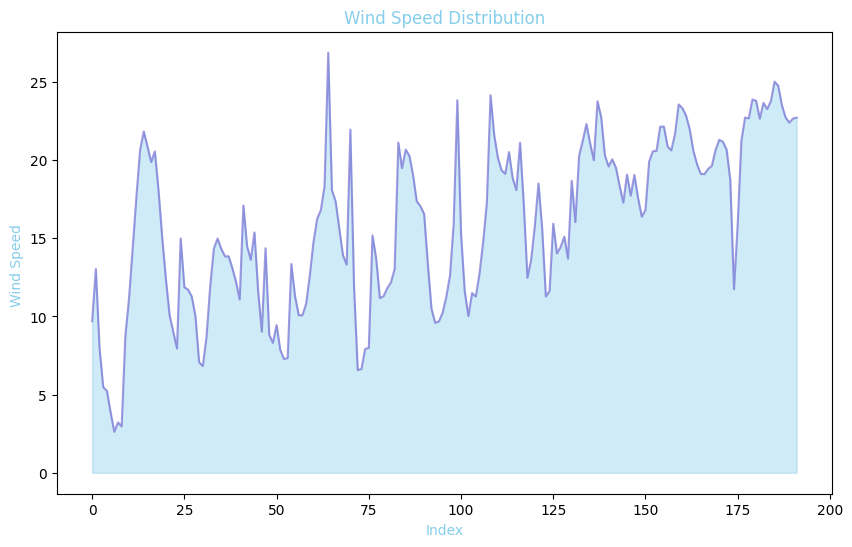

In [96]:
plt.figure(figsize=(10, 6))
plt.fill_between(data.index, data['Wind Speed '], color='skyblue', alpha=0.4)
plt.plot(data.index, data['Wind Speed '], color="Slateblue", alpha=0.6)
plt.xlabel('Index',color='skyblue')
plt.ylabel('Wind Speed ',color='skyblue')
plt.title('Wind Speed Distribution',color='skyblue')
plt.show()

BUBBLE CHART

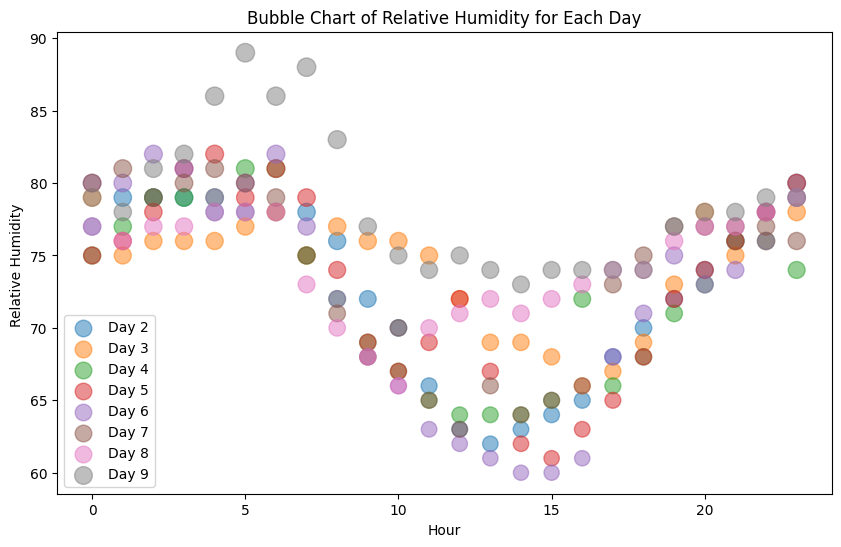

In [97]:
plt.figure(figsize=(10, 6))
for day in data['Day'].unique():
    subset = data[data['Day'] == day]
    plt.scatter(subset['Hour'], subset['Relative Humidity '], s=subset['Relative Humidity ']*2, alpha=0.5, label=f'Day {day}')
plt.xlabel('Hour')
plt.ylabel('Relative Humidity ')
plt.title('Bubble Chart of Relative Humidity for Each Day')
plt.legend()
plt.show()

HEATMAP

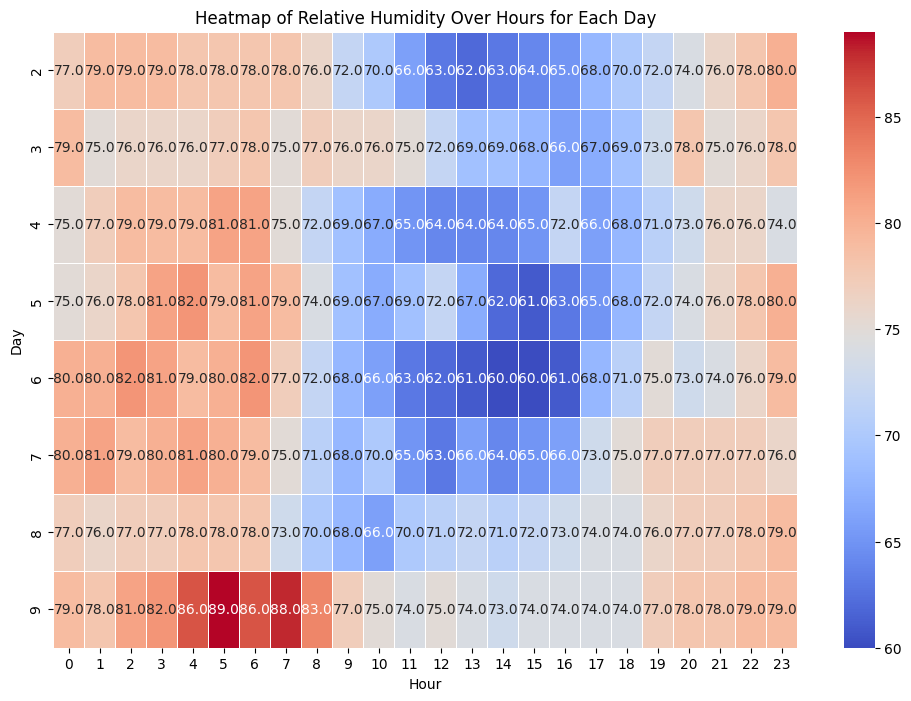

In [98]:
import seaborn as sns
humidity_pivot = data.pivot(index='Day', columns='Hour', values='Relative Humidity ')
plt.figure(figsize=(12, 8))
sns.heatmap(humidity_pivot, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.xlabel('Hour')
plt.ylabel('Day')
plt.title('Heatmap of Relative Humidity Over Hours for Each Day')
plt.show()

PIE CHART

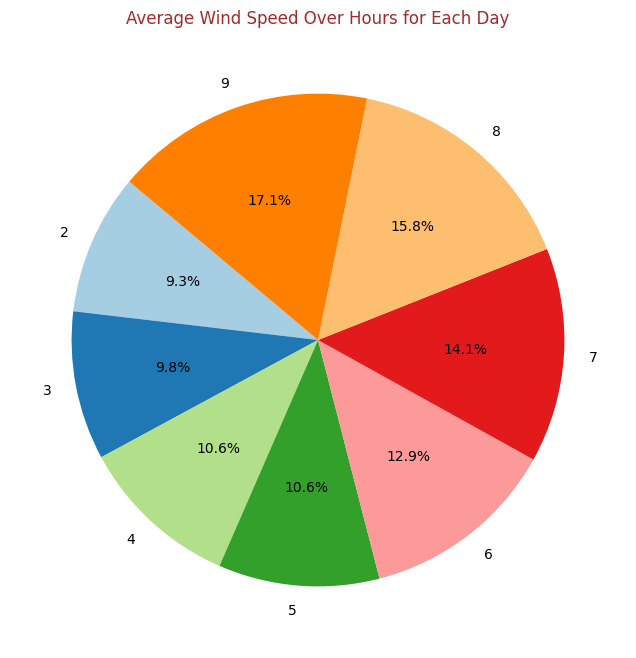

In [99]:
average_wind_speed_per_day = data.groupby('Day')['Wind Speed '].mean()
plt.figure(figsize=(8, 8))
plt.pie(average_wind_speed_per_day, labels=average_wind_speed_per_day.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(average_wind_speed_per_day))))
plt.title('Average Wind Speed Over Hours for Each Day',color='brown')
plt.show()

BAR CHART

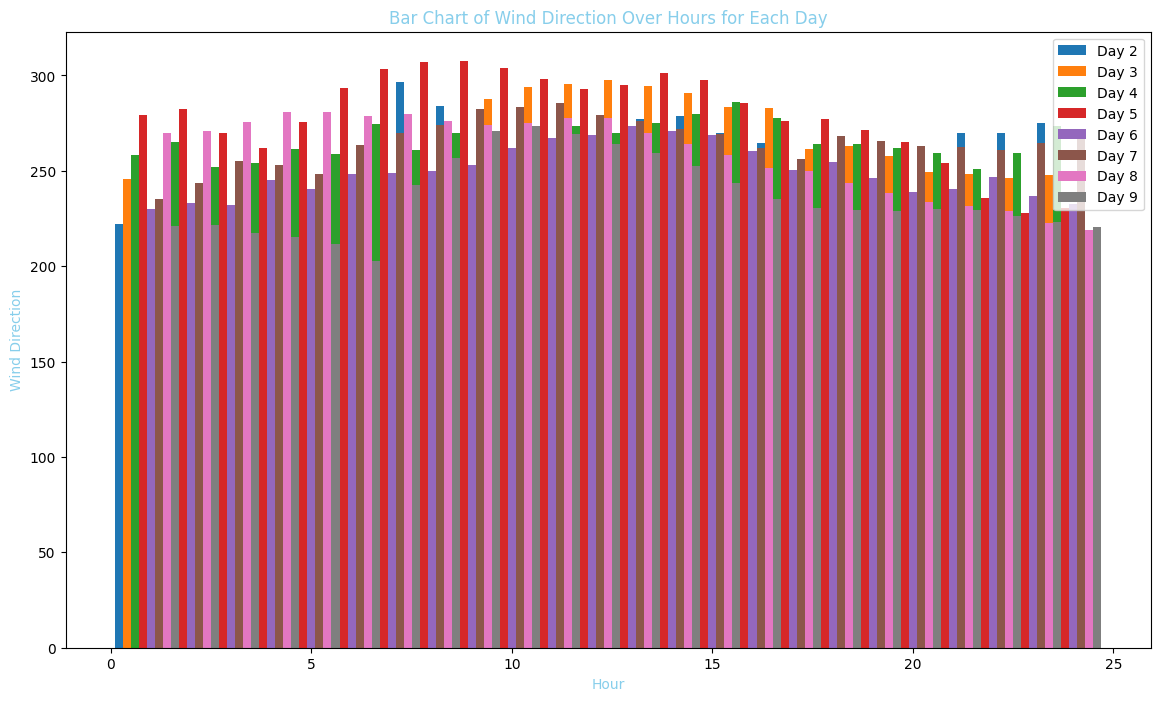

In [100]:
plt.figure(figsize=(14, 8))
for day in data['Day'].unique():
    subset = data[data['Day'] == day]
    plt.bar(subset['Hour'] + (day - 1) * 0.2, subset['Wind Direction '], width=0.2, label=f'Day {day}')
plt.xlabel('Hour',color='skyblue')
plt.ylabel('Wind Direction',color='skyblue')
plt.title('Bar Chart of Wind Direction Over Hours for Each Day',color='skyblue')
plt.legend()
plt.show()

DOT PLOT

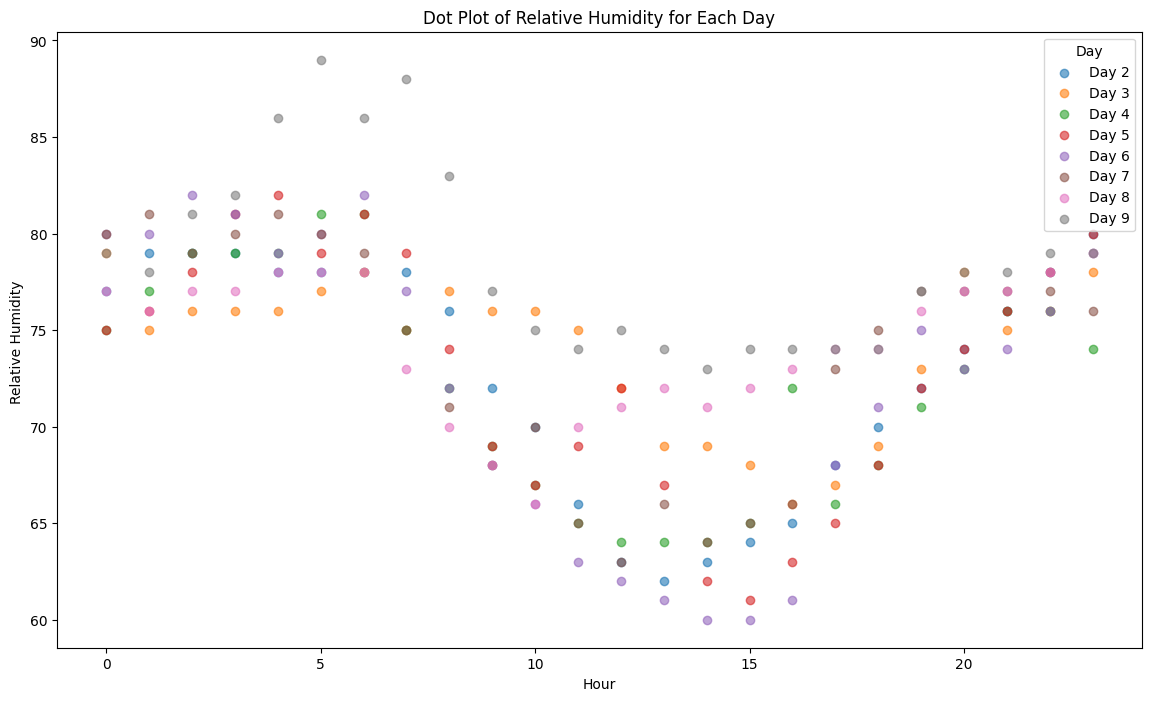

In [101]:
plt.figure(figsize=(14, 8))
for day in data['Day'].unique():
    subset = data[data['Day'] == day]
    plt.scatter(subset['Hour'], subset['Relative Humidity '], label=f'Day {day}', alpha=0.6)
plt.xlabel('Hour')
plt.ylabel('Relative Humidity ')
plt.title('Dot Plot of Relative Humidity for Each Day')
plt.legend(title='Day')
plt.show()

GANTT CHART

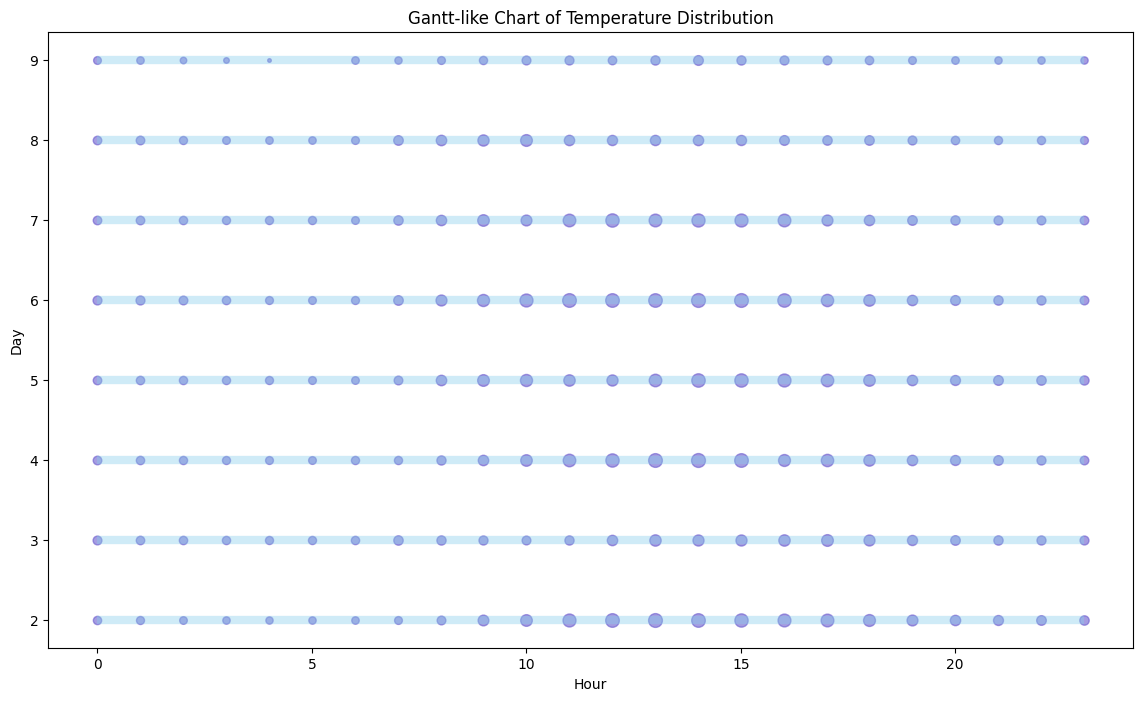

In [102]:
plt.figure(figsize=(14, 8))
for day in data['Day'].unique():
    subset = data[data['Day'] == day]
    plt.hlines(y=day, xmin=subset['Hour'].min(), xmax=subset['Hour'].max(), colors='skyblue', alpha=0.4, linewidth=6)
    for _, row in subset.iterrows():
        plt.scatter(row['Hour'], day, color='Slateblue', s=100 * (row['Temperature '] - data['Temperature '].min()) / (data['Temperature '].max() - data['Temperature '].min()), alpha=0.6)
plt.xlabel('Hour')
plt.ylabel('Day')
plt.title('Gantt-like Chart of Temperature Distribution')
plt.show()

VOILIN PLOT

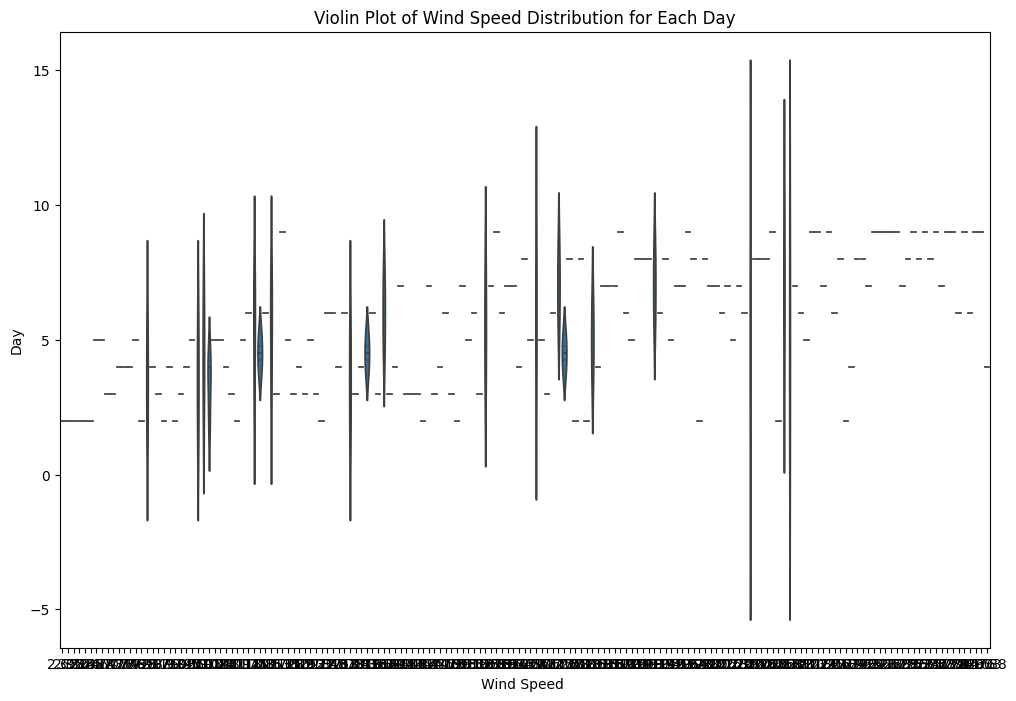

In [103]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Wind Speed ', y='Day', data=data, inner='quartile')
plt.xlabel('Wind Speed ')
plt.ylabel('Day')
plt.title('Violin Plot of Wind Speed Distribution for Each Day')
plt.show()

FULL DATA COMPARISON

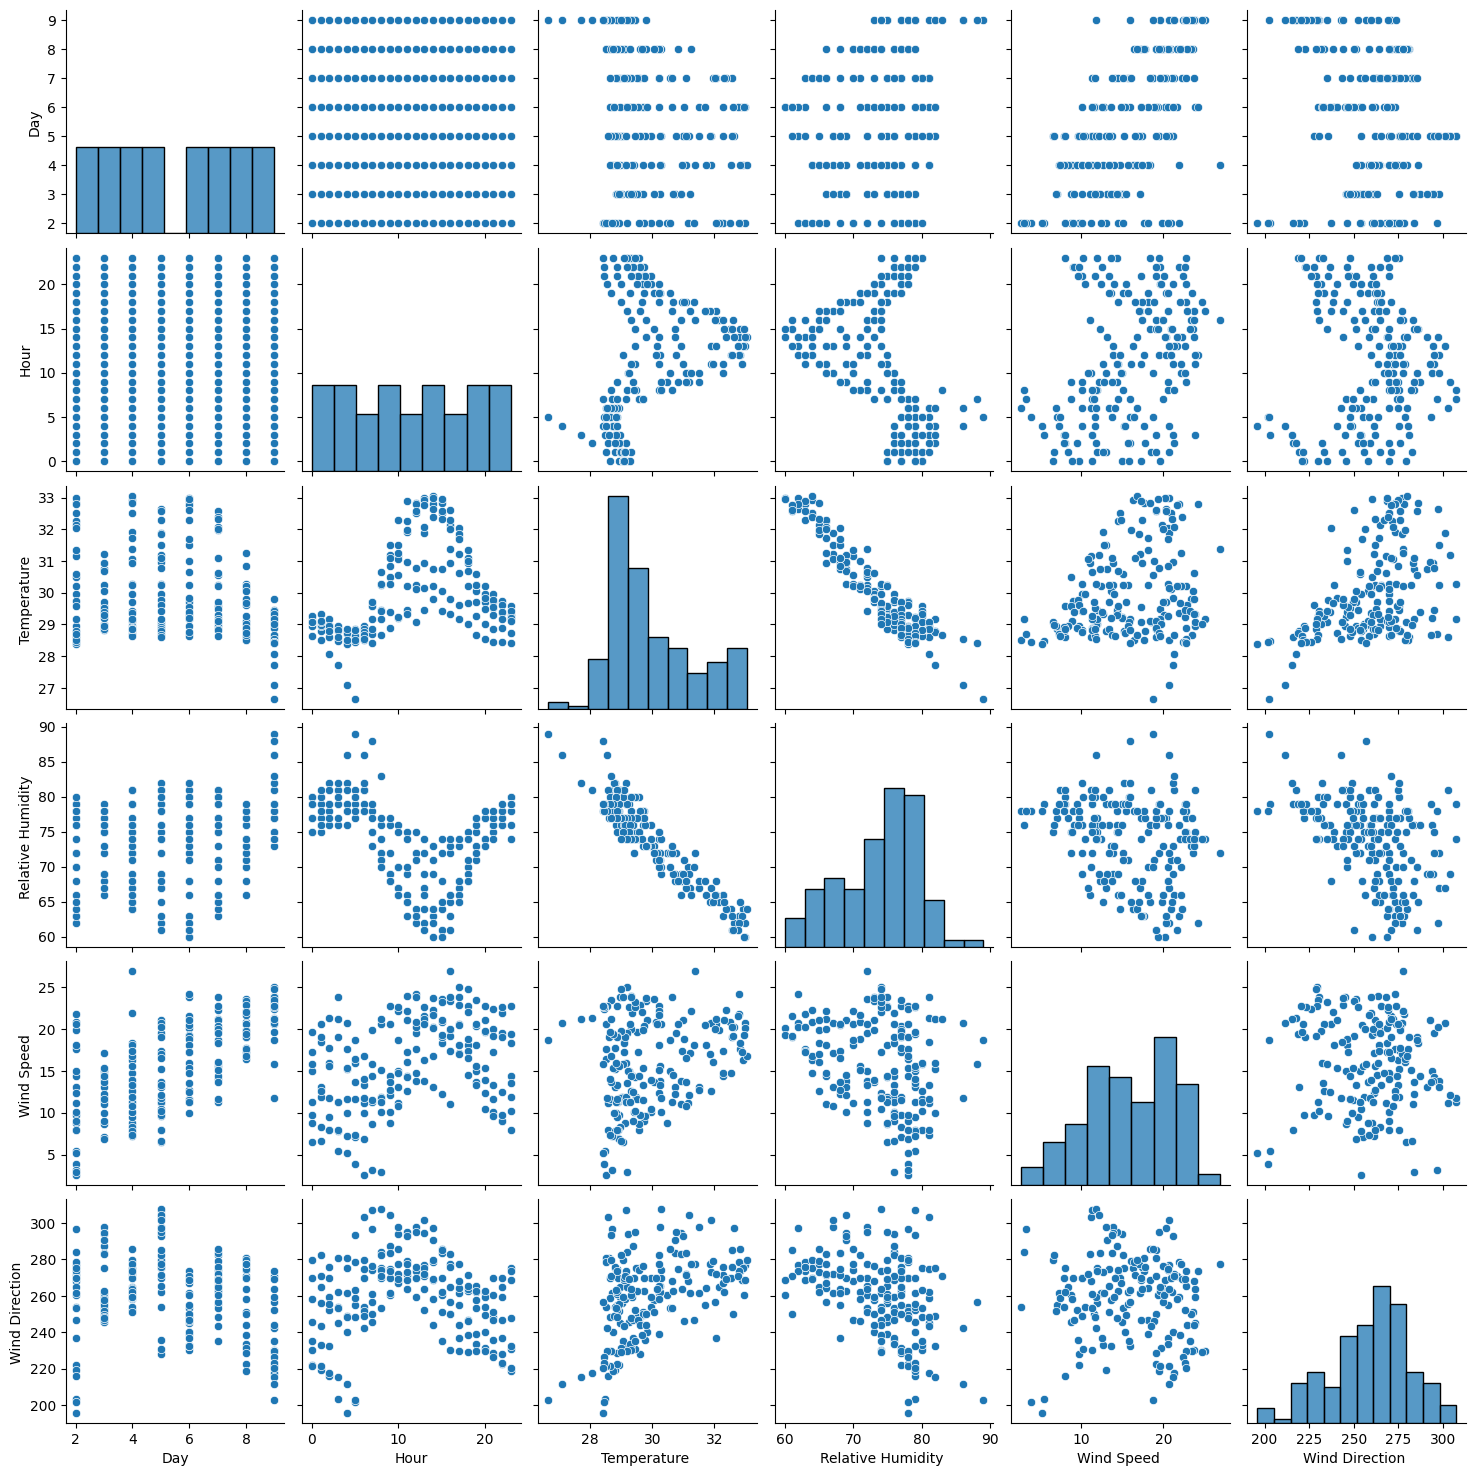

In [104]:
sns.pairplot(data)
plt.show()

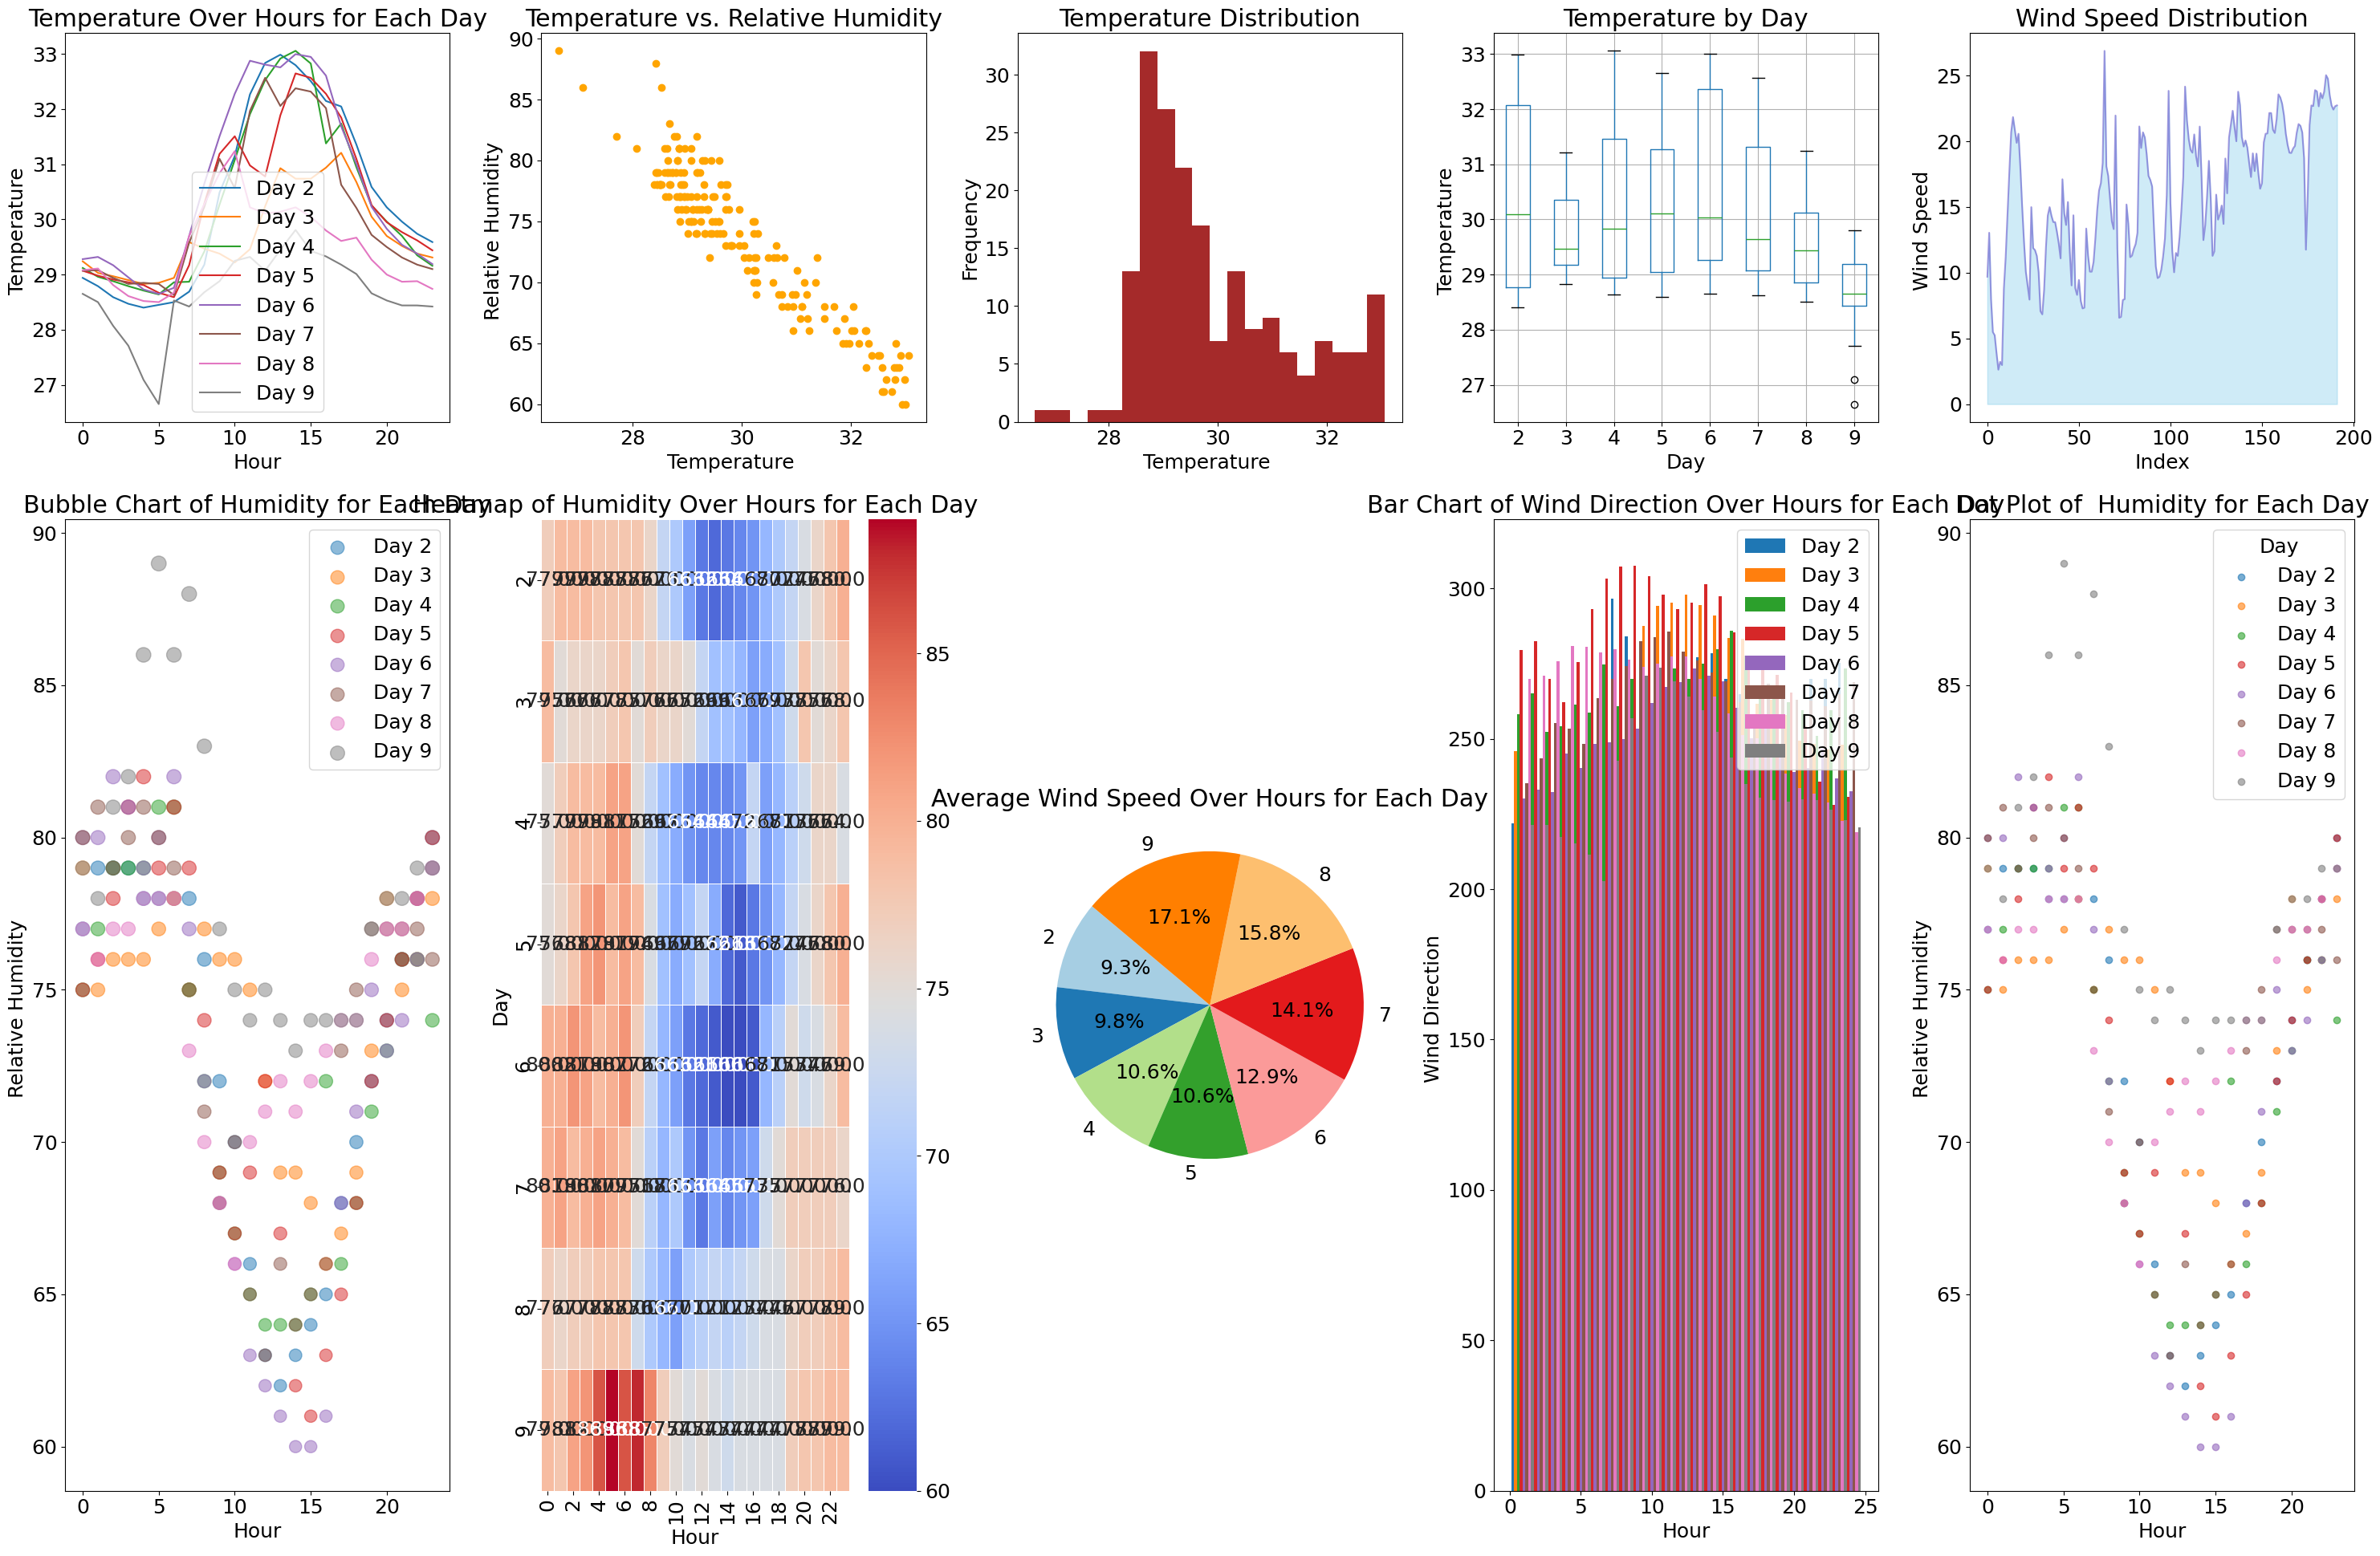

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(30, 20))
gs = gridspec.GridSpec(2, 5, figure=fig,height_ratios=[2, 5]) 

# Plot 1
ax1 = fig.add_subplot(gs[0, 0])
for day in data['Day'].unique():
    subset = data[data['Day'] == day]
    ax1.plot(subset['Hour'], subset['Temperature '], label=f'Day {day}')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Temperature ')
ax1.set_title('Temperature Over Hours for Each Day')
ax1.legend()

# Plot 2
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(data['Temperature '], data['Relative Humidity '], color='orange')
ax2.set_xlabel('Temperature ')
ax2.set_ylabel('Relative Humidity ')
ax2.set_title('Temperature vs. Relative Humidity')

# Plot 3
ax3 = fig.add_subplot(gs[0, 2])
ax3.hist(data['Temperature '], bins=20, color='brown')
ax3.set_xlabel('Temperature ')
ax3.set_ylabel('Frequency')
ax3.set_title('Temperature Distribution')

# Plot 4
ax4 = fig.add_subplot(gs[0, 3])
data.boxplot(column='Temperature ', by='Day', ax=ax4)
ax4.set_xlabel('Day')
ax4.set_ylabel('Temperature ')
ax4.set_title('Temperature by Day')
plt.suptitle('')

# Plot 5
ax5 = fig.add_subplot(gs[0, 4])
ax5.fill_between(data.index, data['Wind Speed '], color='skyblue', alpha=0.4)
ax5.plot(data.index, data['Wind Speed '], color="Slateblue", alpha=0.6)
ax5.set_xlabel('Index')
ax5.set_ylabel('Wind Speed ')
ax5.set_title('Wind Speed Distribution')

# Plot 6
ax6 = fig.add_subplot(gs[1, 0])
for day in data['Day'].unique():
    subset = data[data['Day'] == day]
    ax6.scatter(subset['Hour'], subset['Relative Humidity '], s=subset['Relative Humidity ']*2, alpha=0.5, label=f'Day {day}')
ax6.set_xlabel('Hour')
ax6.set_ylabel('Relative Humidity ')
ax6.set_title('Bubble Chart of Humidity for Each Day')
ax6.legend()

# Plot 7
ax7 = fig.add_subplot(gs[1, 1])
humidity_pivot = data.pivot(index='Day', columns='Hour', values='Relative Humidity ')
sns.heatmap(humidity_pivot, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5, ax=ax7)
ax7.set_xlabel('Hour')
ax7.set_ylabel('Day')
ax7.set_title('Heatmap of Humidity Over Hours for Each Day')

# Plot 8
ax8 = fig.add_subplot(gs[1, 2])
average_wind_speed_per_day = data.groupby('Day')['Wind Speed '].mean()
ax8.pie(average_wind_speed_per_day, labels=average_wind_speed_per_day.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(average_wind_speed_per_day))))
ax8.set_title('Average Wind Speed Over Hours for Each Day')

# Plot 9
ax9 = fig.add_subplot(gs[1, 3])
for day in data['Day'].unique():
    subset = data[data['Day'] == day]
    ax9.bar(subset['Hour'] + (day - 1) * 0.2, subset['Wind Direction '], width=0.2, label=f'Day {day}')
ax9.set_xlabel('Hour')
ax9.set_ylabel('Wind Direction ')
ax9.set_title('Bar Chart of Wind Direction Over Hours for Each Day')
ax9.legend()

# Plot 10
ax10 = fig.add_subplot(gs[1, 4])
for day in data['Day'].unique():
    subset = data[data['Day'] == day]
    ax10.scatter(subset['Hour'], subset['Relative Humidity '], label=f'Day {day}', alpha=0.6)
ax10.set_xlabel('Hour')
ax10.set_ylabel('Relative Humidity ')
ax10.set_title('Dot Plot of  Humidity for Each Day')
ax10.legend(title='Day')

plt.tight_layout()
plt.show()
